In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [28]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0

chemical_link = -0.02
electrical_link = 0.01

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = SA[a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link]

time = 5000.0
Tt = 10000.0
tstep = 0.01

setting_integrator = ( alg = Vern9(), adaptive = false, dt = tstep );

In [29]:
ds =  ContinuousDynamicalSystem( HR, u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.02, 0.01]

In [30]:
sol = trajectory(ds, time, Δt = tstep; Ttr = Tt, diffeq = setting_integrator)
tspan = 0.0:tstep:time;

## Timeseries and phase projections

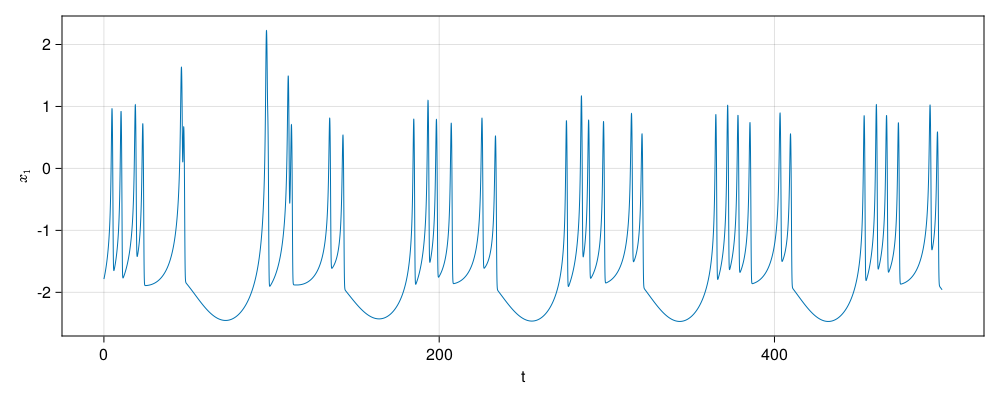

In [31]:
ts = 1; tf = 50000
f = Figure(resolution = (1000, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{1}")
lines!(axis,tspan[ts:tf], sol[ts:tf, 4]+sol[ts:tf, 1], linewidth = 1.0)
f

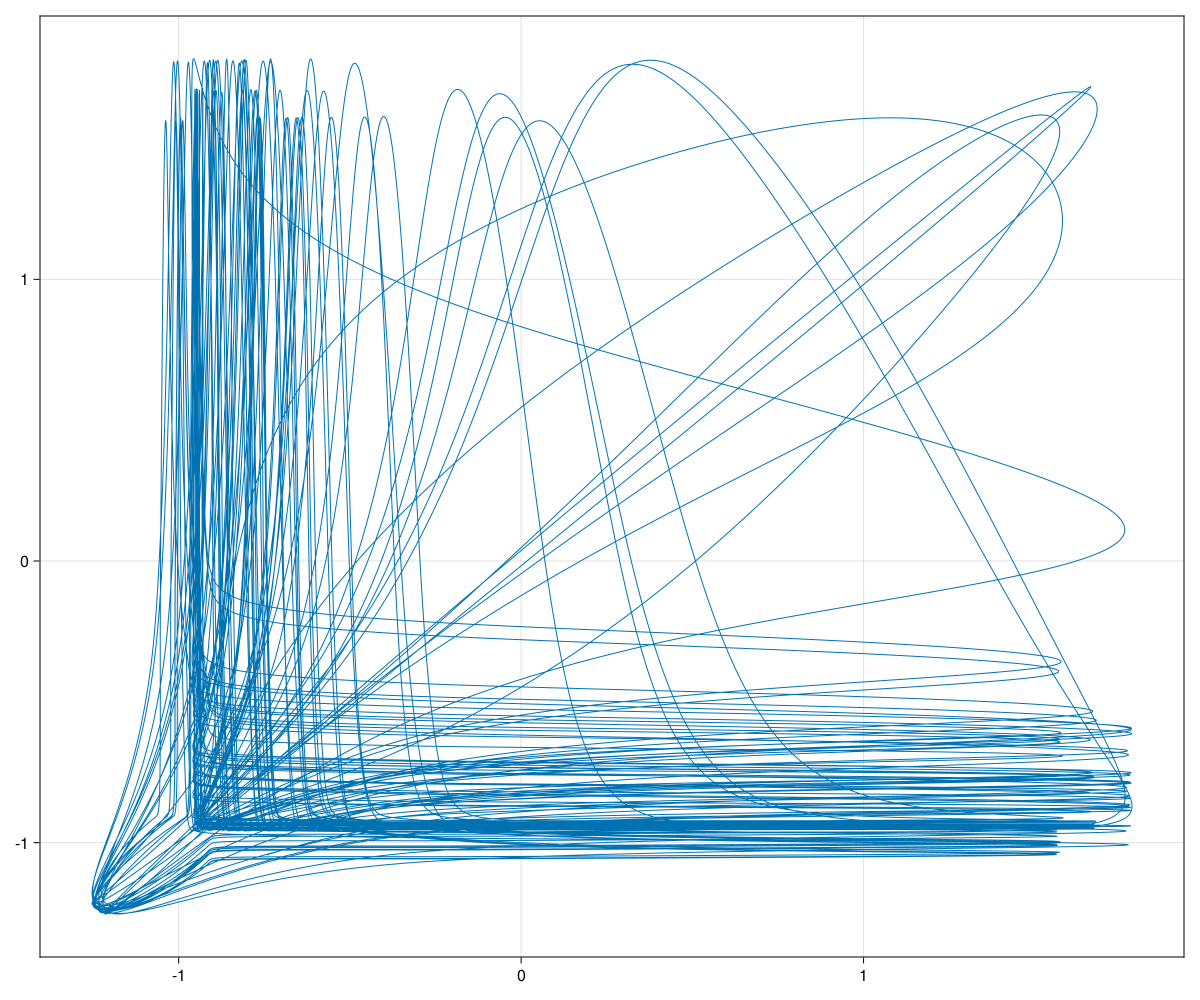

In [32]:
ts = 1; tf = 200000
f = Figure(resolution = (1200, 1000))
axis = Axis(f[1, 1])
lines!(axis, sol[ts:tf, 1], sol[ts:tf, 4], linewidth = 1.0)
f

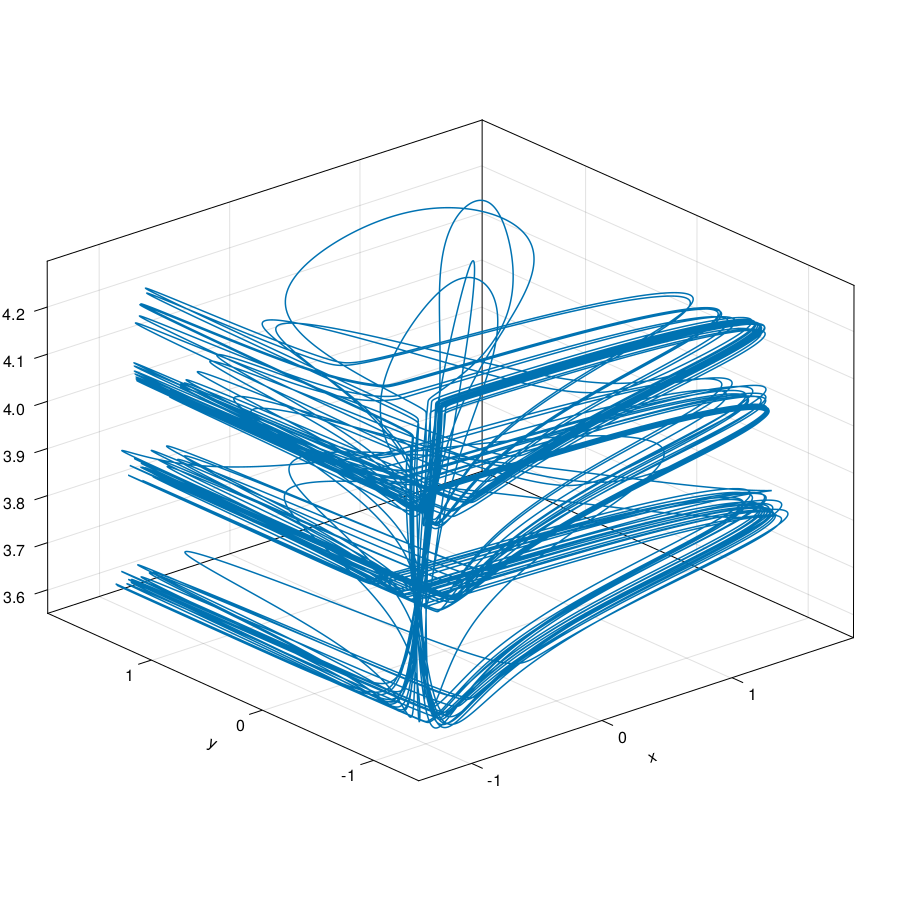

In [33]:
ts, tf = 1, 200000
f = Figure(resolution = (900,900))
axis3d = Axis3(f[1, 1])
lines!(axis3d, sol[ts:tf, 1], sol[ts:tf, 4], sol[ts:tf, 3])
f

## Poincare surface

In [312]:
surface = (2, 0.0)
time_final = 1000.0
transient_time= 20000.0;

In [313]:
psos = poincaresos(ds, surface, time_final; Ttr = transient_time, diffeq = setting, rootkw = (xrtol = 1e-11, atol = 1e-11));

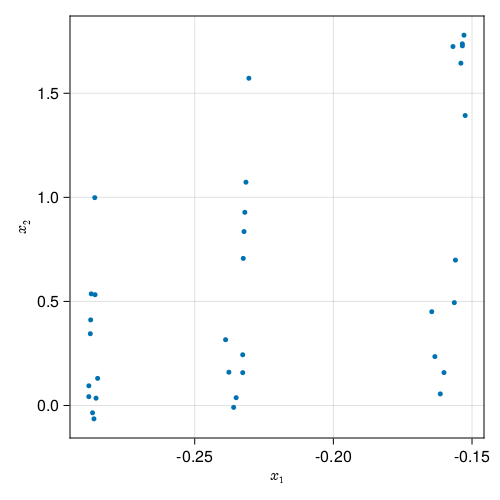

In [314]:
f = Figure(resolution = (500, 500))
axis = Axis(f[1, 1], xlabel = L"x_1", ylabel = L"x_2")
scatter!(axis,psos[:, 1], psos[:, 4], markersize = 5.0)
f

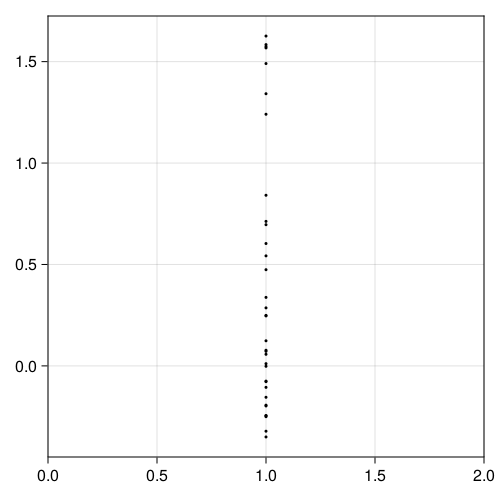

In [315]:
f = Figure(resolution = (500, 500))
axis = Axis(f[1, 1])
scatter!(axis, fill(1, length(psos[:, 1])), psos[:, 1] + psos[:, 4]; color = ("black", 1.0), markersize = 3.0)
f


## Lyapunov spectrum

In [172]:
Λ = lyapunovspectrum(ds, 50000.0; Ttr = 50000.0, diffeq = setting_integrator)

6-element Vector{Float64}:
  0.0026947946722594876
  0.000950677087271832
 -4.0030840095982974e-5
 -0.017432389706960108
 -8.601208643308484
 -8.91439419824963